In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [39]:
og_data = 'speech_data/female.wav'
y,sr = librosa.load(og_data, sr = 16000) # sampling rate를 16000으로 설정

print(y.shape, sr) # 816452/16000 =~ 51s

(786696,) 16000


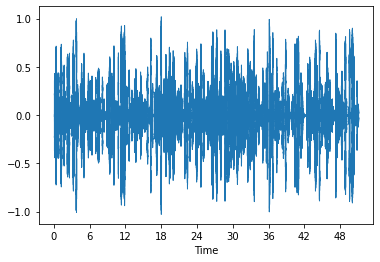

In [9]:
librosa.display.waveshow(y, sr=sr) # 입력 음성의 파형(time-power)

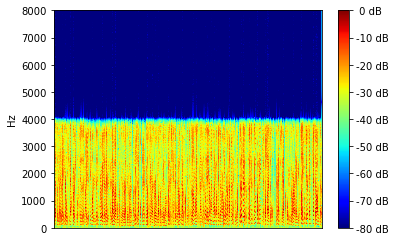

In [10]:
# stft의 power 추출 및 출력(n_fft 기본값, hop_lenght = None)
## abs = absolute(절대값)
S = np.abs(librosa.stft(y)) 
#print(stft)
S_dB =librosa.power_to_db(S, ref=np.max)
# spectrogram 출력
librosa.display.specshow(S_dB, sr=sr, hop_length = None, y_axis='linear', cmap = cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()


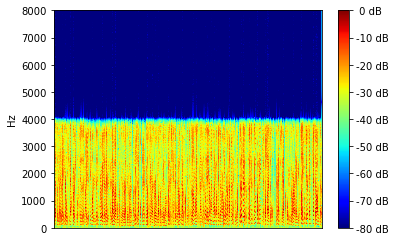

In [11]:
# center = false -> 데이터가 좌측부터 읽어낸다
S_left = np.abs(librosa.stft(y, center = False))
S_left_dB =librosa.power_to_db(S_left, ref=np.max)
# spectrogram 출력
librosa.display.specshow(S_dB, sr=sr, hop_length = None, y_axis='linear', cmap = cm.jet)
plt.colorbar(format='%2.0f dB') # %n.mf -> n : 자리 이동, m : 자릿수
plt.show()


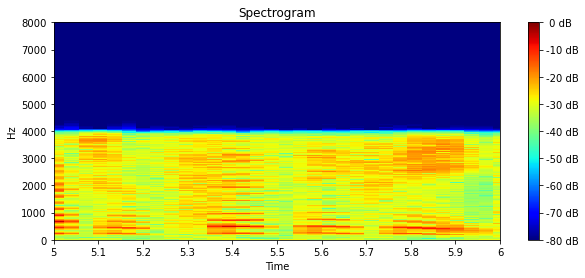

In [48]:
# n_fft, hop, window 모두 설정, 바꿔가면서 변화 관찰해볼만 하다.
# xlim, ylim(~5000hz) 또한 설정, 일부분만 보기 때문에 파라미터의 변화에 따른 변화 관찰하기 좋음

S_len = np.abs(librosa.stft(y, n_fft=8192, hop_length=512, win_length=2048))
S_len_dB = librosa.power_to_db(S_len, ref = np.max)
plt.figure(figsize=(10,4))

# spectrogram 출력
librosa.display.specshow(S_len_dB, sr=sr, hop_length=512, y_axis='linear', x_axis = 'time', cmap=cm.jet)
plt.colorbar(format='%2.0f dB')
plt.xlim(5,6)
#plt.ylim(0,5000)
plt.title('Spectrogram');
# plt.savefig('Spectrogram_fft4096hop512win2048.png')
plt.show()

<h3> n_fft, window size, hop_length의 비교 </h3><br>
스펙트럼을 통해 본 매개변수가 주파수 해상도에 어떤 영향을 주는지 알 수 있다. <br>
우선, n_fft를 똑같이 하고 win_length에 차이를 두었을 때는 주파수 해상도의 변화가 없었다. <span style="color: magenta;">즉, 두 스펙트럼이 거의 동일한 주파수 다양성을 가지고 있었다.</span> <br>
그 다음, n_fft를 win_length의 4배씩 하여 n_fft, win_length = (8192, 2048)과 (4096, 1024)로 제한을 두었을 때는 두 스펙트럼의 주파수 해상도에 많은 차이가 난다는 것을 알 수 있다. <span style="color: magenta;"> 특히, (4096, 1024)로 돌리면 주파수가 650hz 이상부터는 거의 없는 수준이라 해도 무방하기 때문에, 시간 해상도에서 장점이 있지만 너무나도 많은 주파수를 컷해야한다는 문제 발생.</span> 실제로는 시간 해상도와 주파수 해상도의 적절한 균형이 필요하다.

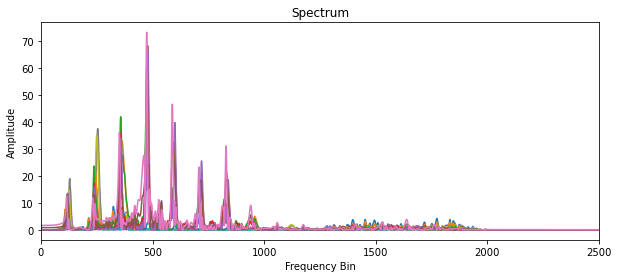

In [43]:
# spectrum
# n_fft 8192 hop_length 512 win_length 2048

n_fft = 8192 # stft의 n_fft와 동일 (대략 1/8s)
plt.figure(figsize=(10,4))
ft = np.abs(librosa.stft(y[4*n_fft:5*n_fft], n_fft = n_fft, hop_length = 512, win_length = 2048))
#ft = librosa.power_to_db(ft, ref=np.max)
plt.xlim(0, 2500)
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

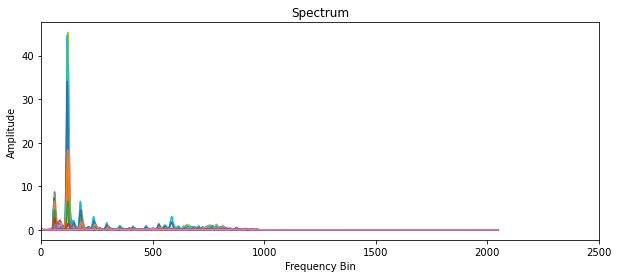

In [41]:
# n_fft 4096 hop_length 256 win_length 1024(모두 절반으로 줄여놓은 상태)

n_fft = 4096 # stft의 n_fft와 동일 (대략 1/8s)
plt.figure(figsize=(10,4))
ft = np.abs(librosa.stft(y[4*n_fft:5*n_fft], n_fft = n_fft, hop_length = 256, win_length = 1024))
#ft = librosa.power_to_db(ft, ref=np.max)
plt.xlim(0,2500)
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');